## Importing modules and adding project directory

In [1]:
# including the project directory to the notebook level
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
#importing modules
import warnings
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,7)
plt.rc('legend',**{'fontsize':16})
from CoolProp.HumidAirProp import HAPropsSI

#modules for data reading and parsing dates
from dataprocess import dataprocessor as dp
from dataprocess import results_process as rp

In [3]:
def approximate_match(col_name):
    for name in rp.addl['names_abreviation'].keys():
        if col_name in name:
            return rp.addl['names_abreviation'][name]
    return col_name

## Getting the results of the Chilled Water Energy Learning

### load and merge the dataframes; inverse scale the data

In [4]:
# load data path
cwedata = dp.readfolder('../models/adaptive/Trial_0/cwe/detailedplots/')

# Basic preprocessing read data and perform certain available operations and return processed dataframe
processmethods = ['files2dflist', 'merge_dflist']
cwe = cwedata.return_df(processmethods=processmethods)


# inverse scale normalized values
cwe = rp.process_plots(cwe, 'Actual cwe', 'Predicted cwe')
# process names for better understanding
cwe.columns = [approximate_match(i) for i in cwe.columns]

### Plot all the data related to Prediction vs True Cooling Water energy

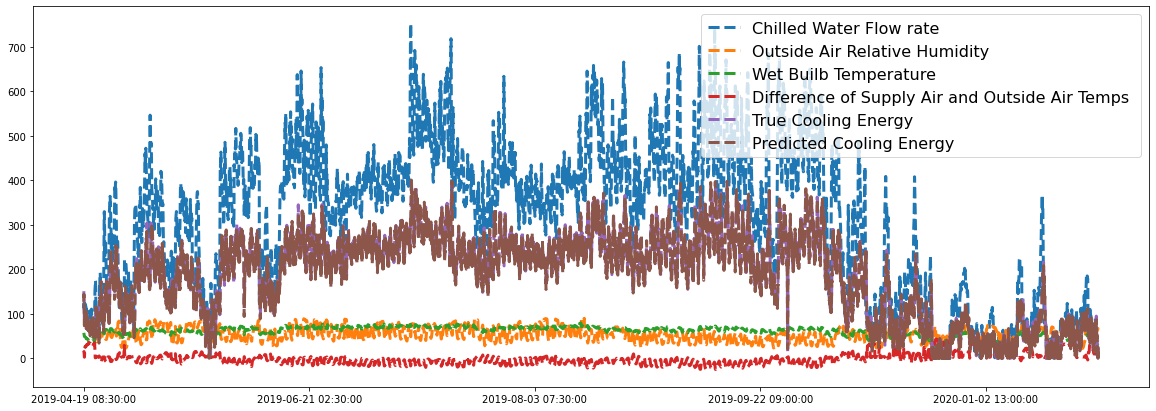

In [5]:
plt.rcParams['figure.figsize']=(20,7)
cwe.plot(y=cwe.columns[:], linewidth=3.0, style='--')

### Plot a small timelines for better visualization

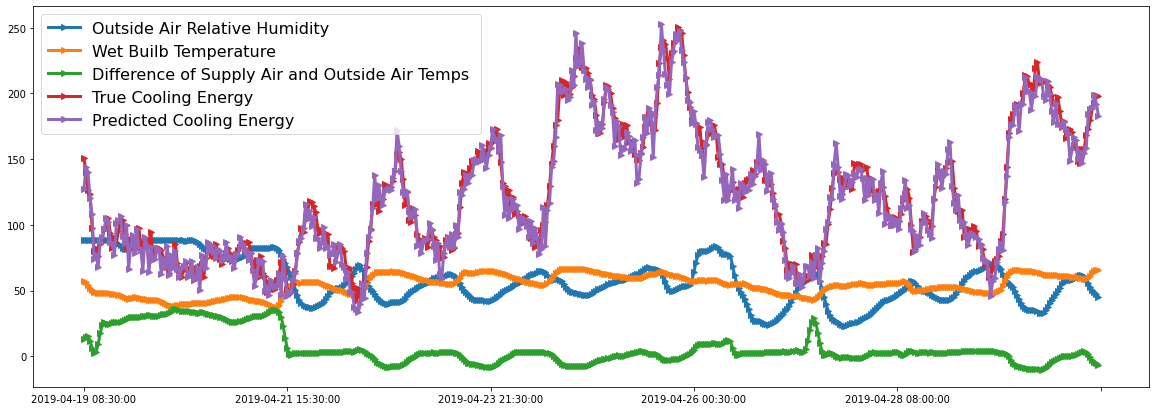

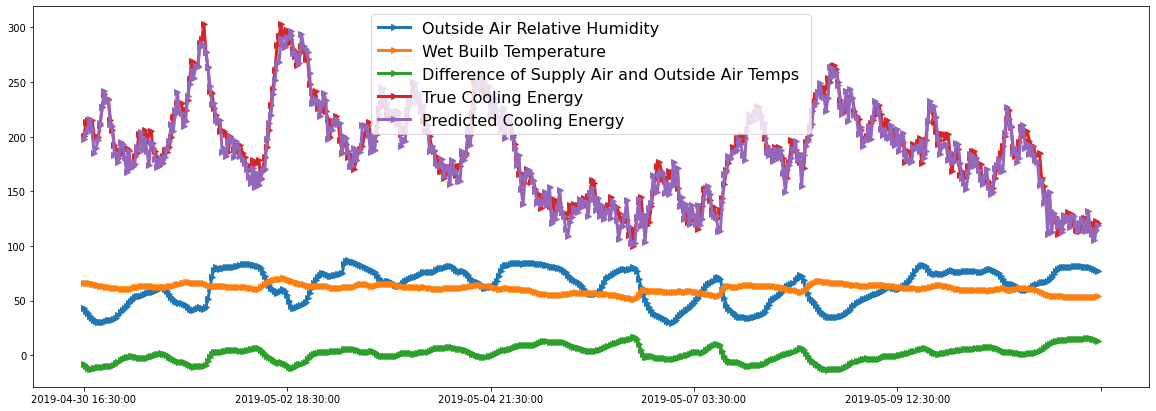

In [6]:
plt.rcParams['figure.figsize']=(20,7)
cwe.iloc[0:500,:].plot(y=cwe.columns[1:], linewidth=3.0, style='>-')
cwe.iloc[500:1000,:].plot(y=cwe.columns[1:], linewidth=3.0, style='>-')

### Plot the weekly relearn error

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


Name of the file:  ../models/adaptive/Trial_0/cwe/30min Results_File.txt


Text(11, 44, 'Fully Dense Model used for Energy Prediction')

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


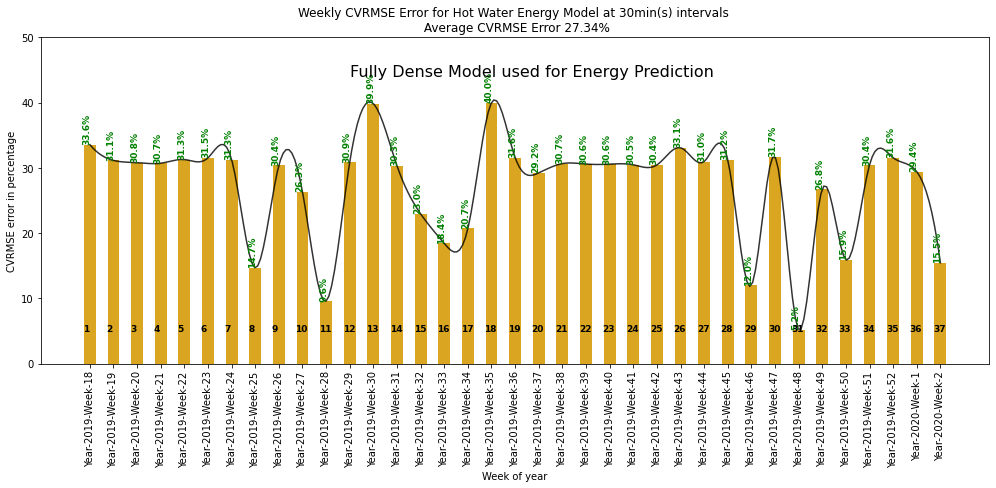

In [7]:
rp.barchart_regression(path='../models/adaptive/Trial_0/cwe/', period=6, savepath='../models/adaptive/Trial_0/cwe/')
plt.text(x=11,y=44,s='Fully Dense Model used for Energy Prediction',fontsize=16)

##  Getting the results of the Hot Water Energy Learning

In [8]:
# load data path
hwedata = dp.readfolder('../models/adaptive/Trial_0/hwe/detailedplots/')

# Basic preprocessing read data and perform certain available operations and return processed dataframe
processmethods = ['files2dflist', 'merge_dflist']
hwe = hwedata.return_df(processmethods=processmethods)


# inverse scale normalized values
hwe = rp.process_plots(hwe, 'Actual hwe', 'Predicted hwe')
# process names for better understanding
hwe.columns = [approximate_match(i) for i in hwe.columns]

### Plot all the data related to Prediction vs True Hot Water energy

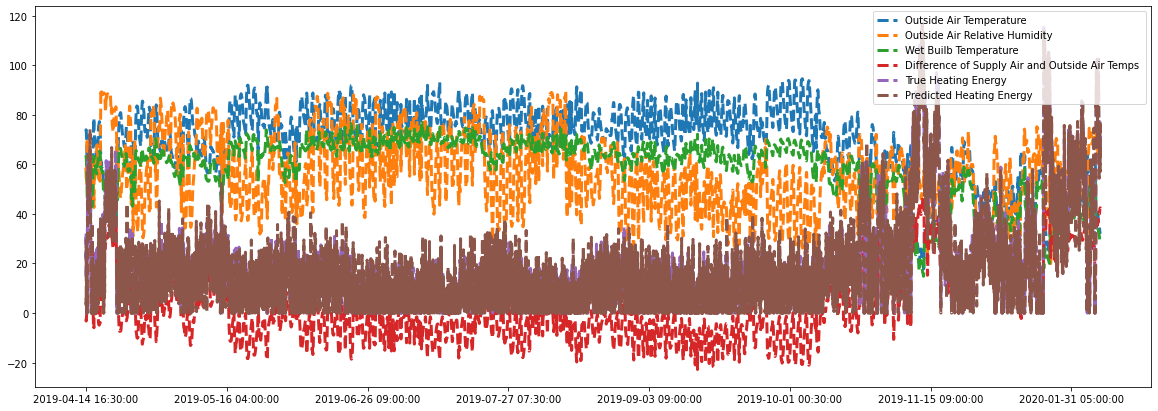

In [9]:
plt.rcParams['figure.figsize']=(20,7)
hwe.plot(y=hwe.columns, linewidth=3.0, style='--')

### Plot a small timeline for better visualization

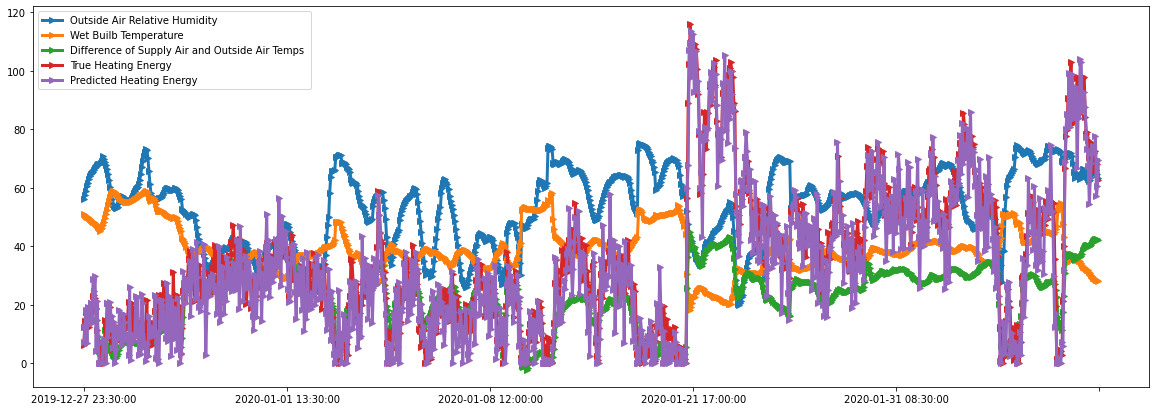

In [10]:
plt.rcParams['figure.figsize']=(20,7)
hwe.iloc[-1000:,:].plot(y=hwe.columns[1:], linewidth=3.0, style='>-')

### Plot the weekly relearn error

Name of the file:  ../models/adaptive/Trial_0/hwe/30min Results_File.txt


Text(11, 43, 'Fully Dense Model used for Energy Prediction')

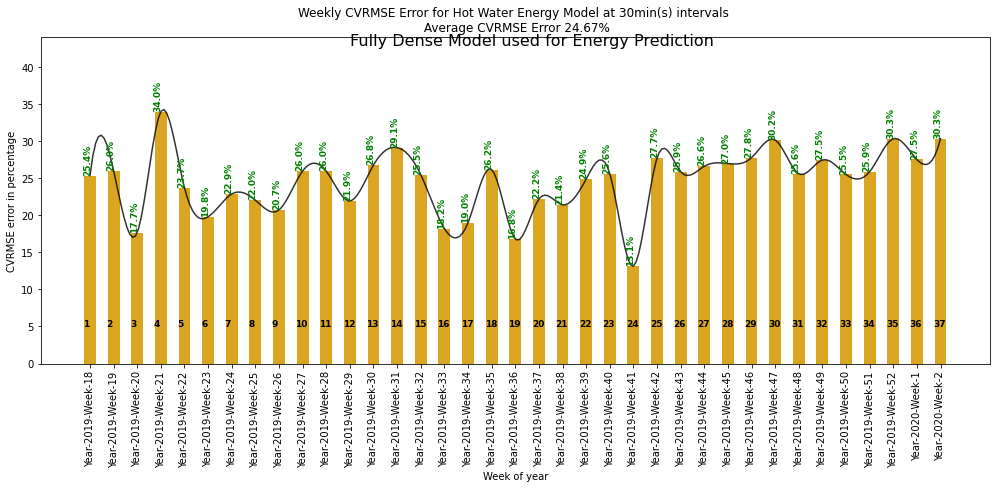

In [11]:
rp.barchart_regression(path='../models/adaptive/Trial_0/hwe/', period=6, savepath='../models/adaptive/Trial_0/hwe/')
plt.text(x=11,y=43,s='Fully Dense Model used for Energy Prediction',fontsize=16)

## Getting the results of the Hot Water Energy Valve state

In [10]:
# load data path
vlvdata = dp.readfolder('../models/adaptive/Trial_0/vlv/detailedplots/')

# Basic preprocessing read data and perform certain available operations and return processed dataframe
processmethods = ['files2dflist', 'merge_dflist']
vlv = vlvdata.return_df(processmethods=processmethods)


# convert probabilities to classes
vlv = rp.process_plots_softmax(vlv, 'Actual valve_state', 'Predicted valve_state')
# scale for better visualization
#vlv['Actual valve_state'] = vlv['Actual valve_state']*100
#vlv['Predicted valve_state'] = vlv['Predicted valve_state']*100


# process names for better understanding
vlv.columns = [approximate_match(i) for i in vlv.columns]

### Plot all the data for predicting valve state

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


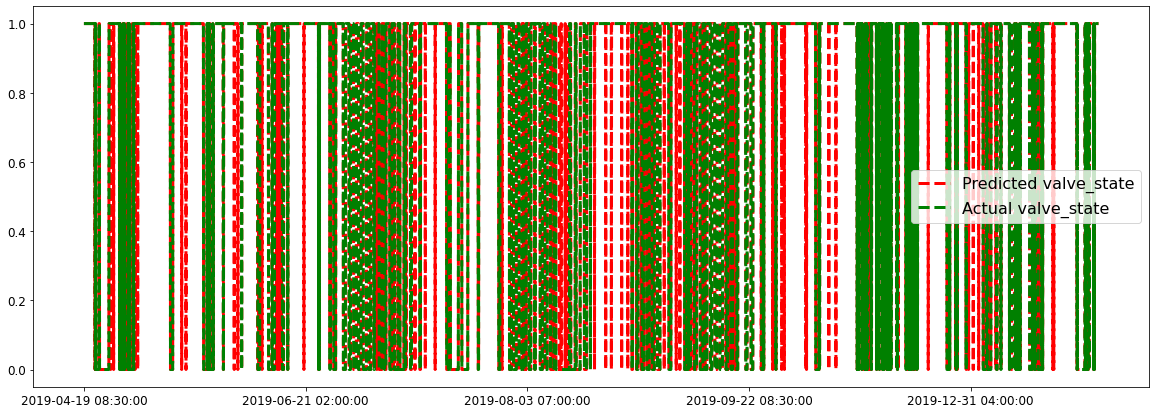

In [12]:
plt.rcParams['figure.figsize']=(20,7)
vlv.plot(y=vlv.columns[[-1,-2]], linewidth=3.0, style=['r--','g--'],fontsize=12)

### Plot the tested metrics

Name of the file:  ../models/adaptive/Trial_0/vlv/30min Results_File.txt


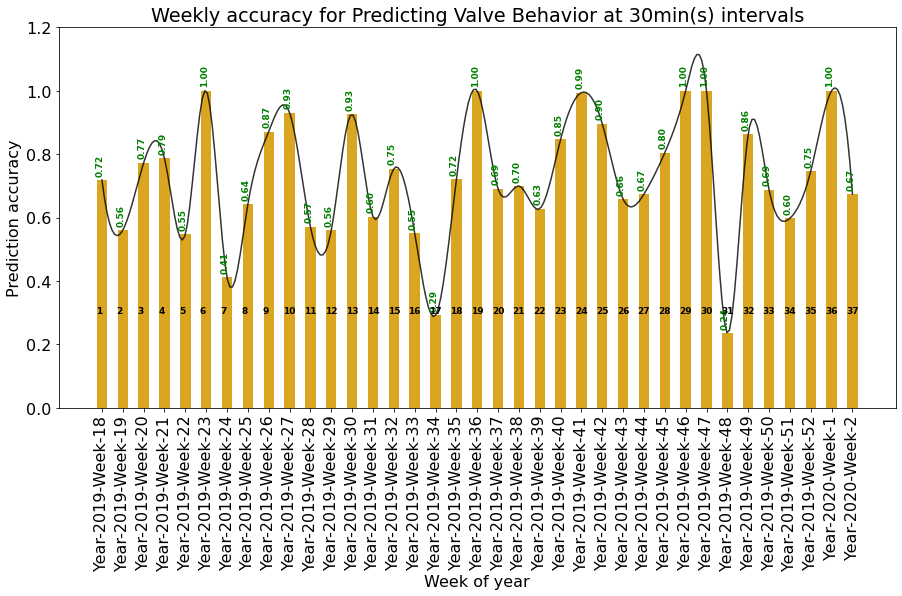

In [6]:
rp.barchart_classifier(path='../models/adaptive/Trial_0/vlv/', period=6,
                    savepath='../models/adaptive/Trial_0/vlv/', metricname='accuracy')

Name of the file:  ../models/adaptive/Trial_0/vlv/30min Results_File.txt


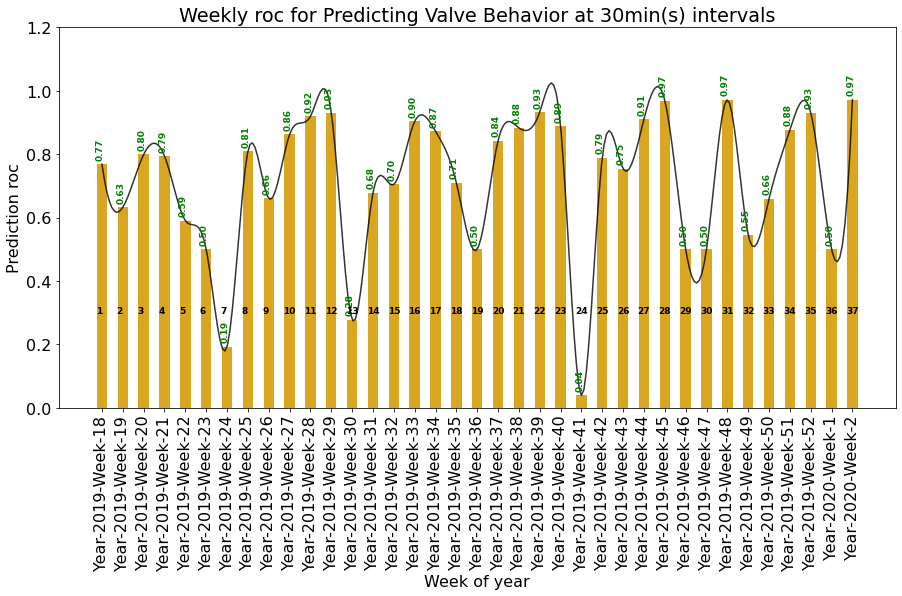

In [7]:
rp.barchart_classifier(path='../models/adaptive/Trial_0/vlv/', period=6,
                    savepath='../models/adaptive/Trial_0/vlv/', metricname='roc')

Name of the file:  ../models/adaptive/Trial_0/vlv/30min Results_File.txt


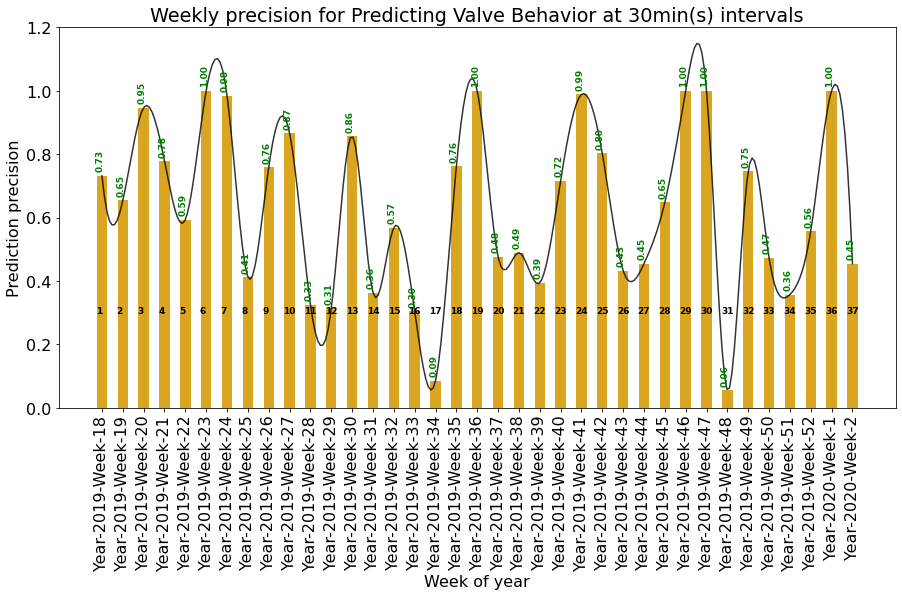

In [8]:
rp.barchart_classifier(path='../models/adaptive/Trial_0/vlv/', period=6,
                    savepath='../models/adaptive/Trial_0/vlv/', metricname='precision')